# Base

# 1. 蒙地卡羅

## 1. Monte Carlo

The term "Monte Carlo method" was firstly introduced in 1947 by Nicholas Metropolis.

## 2. Reference

Metropolis. The beginning of the Monte Carlo method. Los Alamos Science, 125–130, 1987.

## 3. Monte Carlo Algorithms

Monte Carlo refers to algorithms that rely on repeated random sampling to obtain numerical results.

The output of Monte Carlo algorithms can be incorrect.

 - In all of our examples, the algorithms' outputs are incorrect.

 - But they are close to the correct solution.


# 6. Application 1: Calculating Pi

We already know $\pi \approx 3.141592653589$ ...

Pretend we do not know the value of $\pi$.

Can we find it out (approximately) using a random number generator?

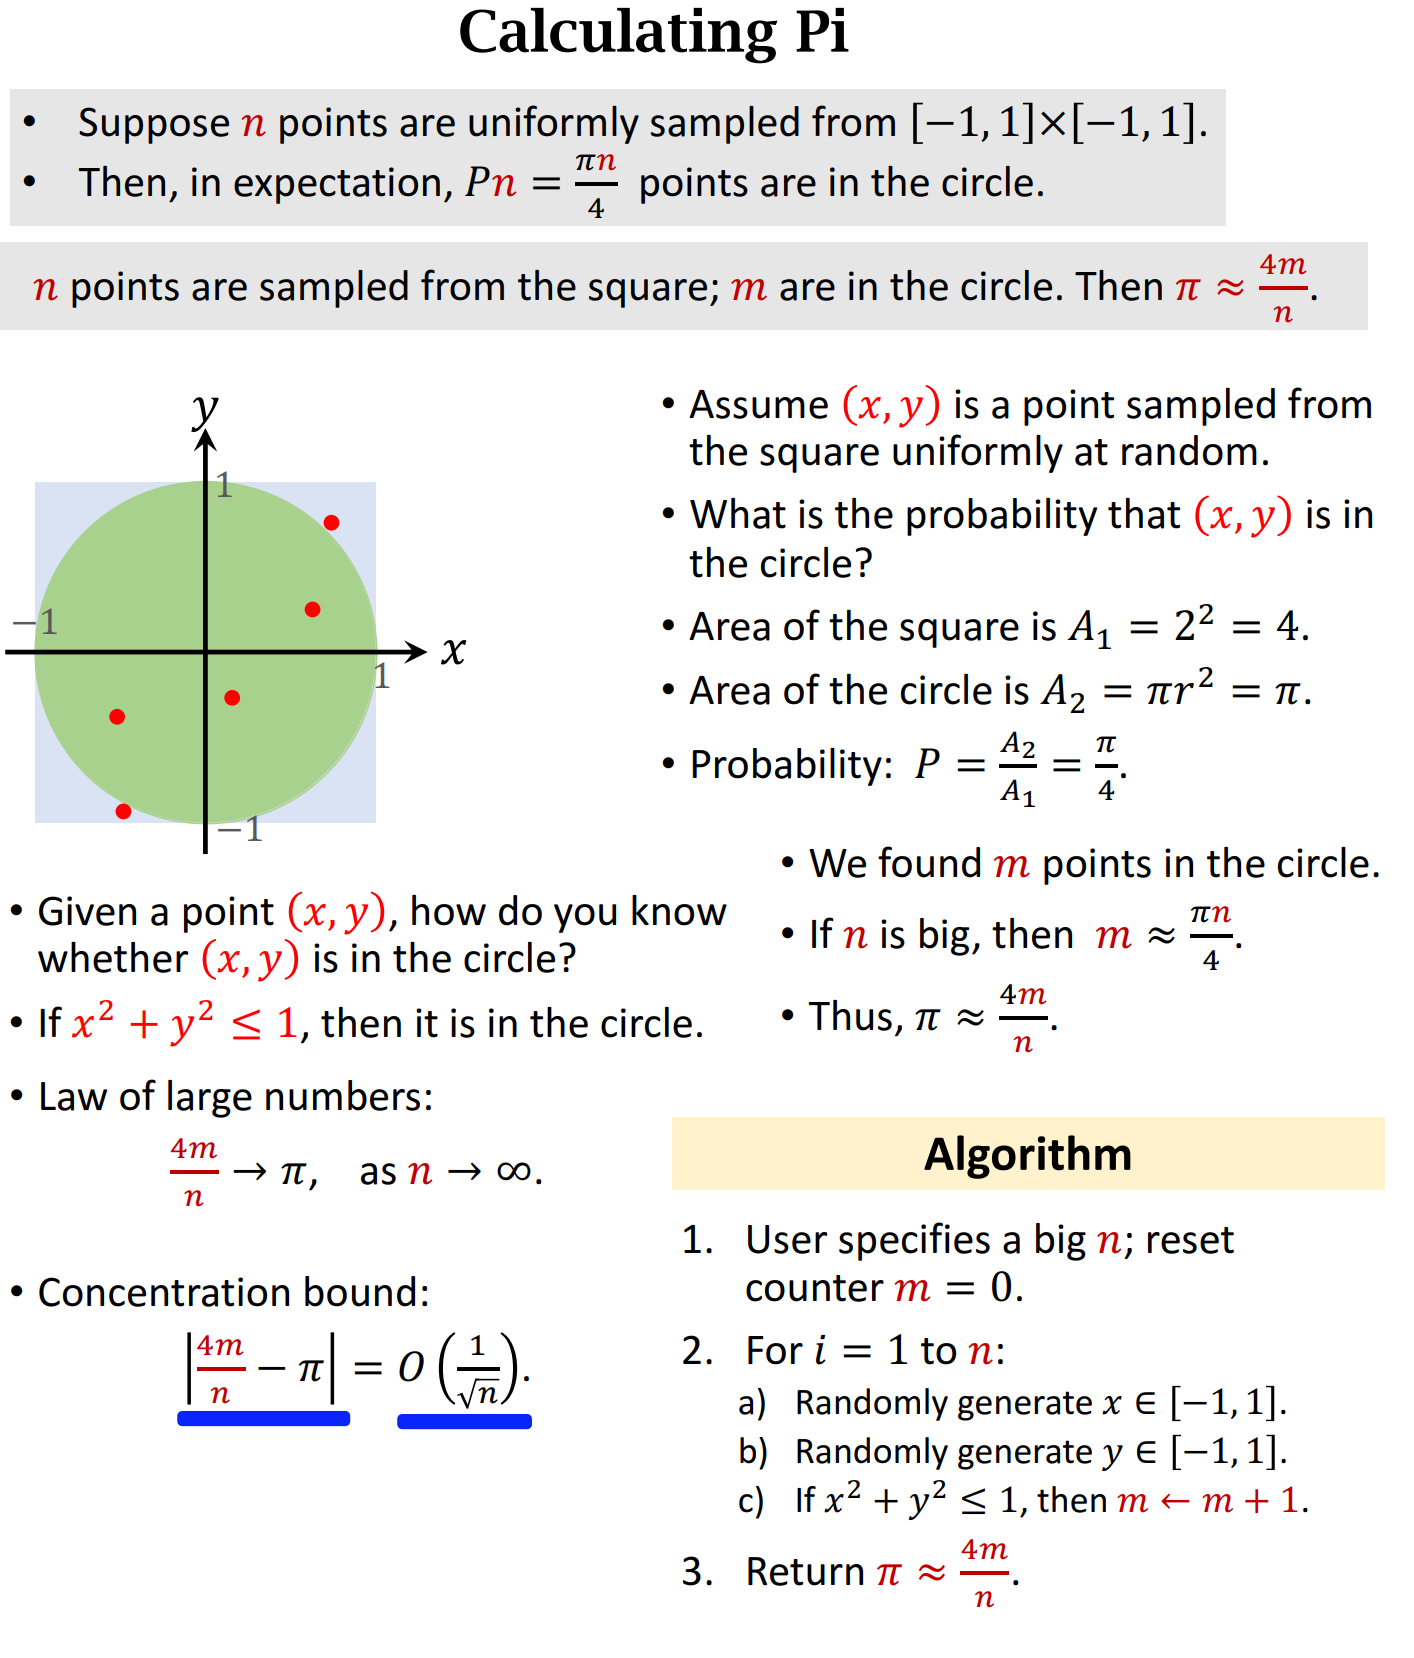

# 7. Application 2: Buffon's Needle Problem

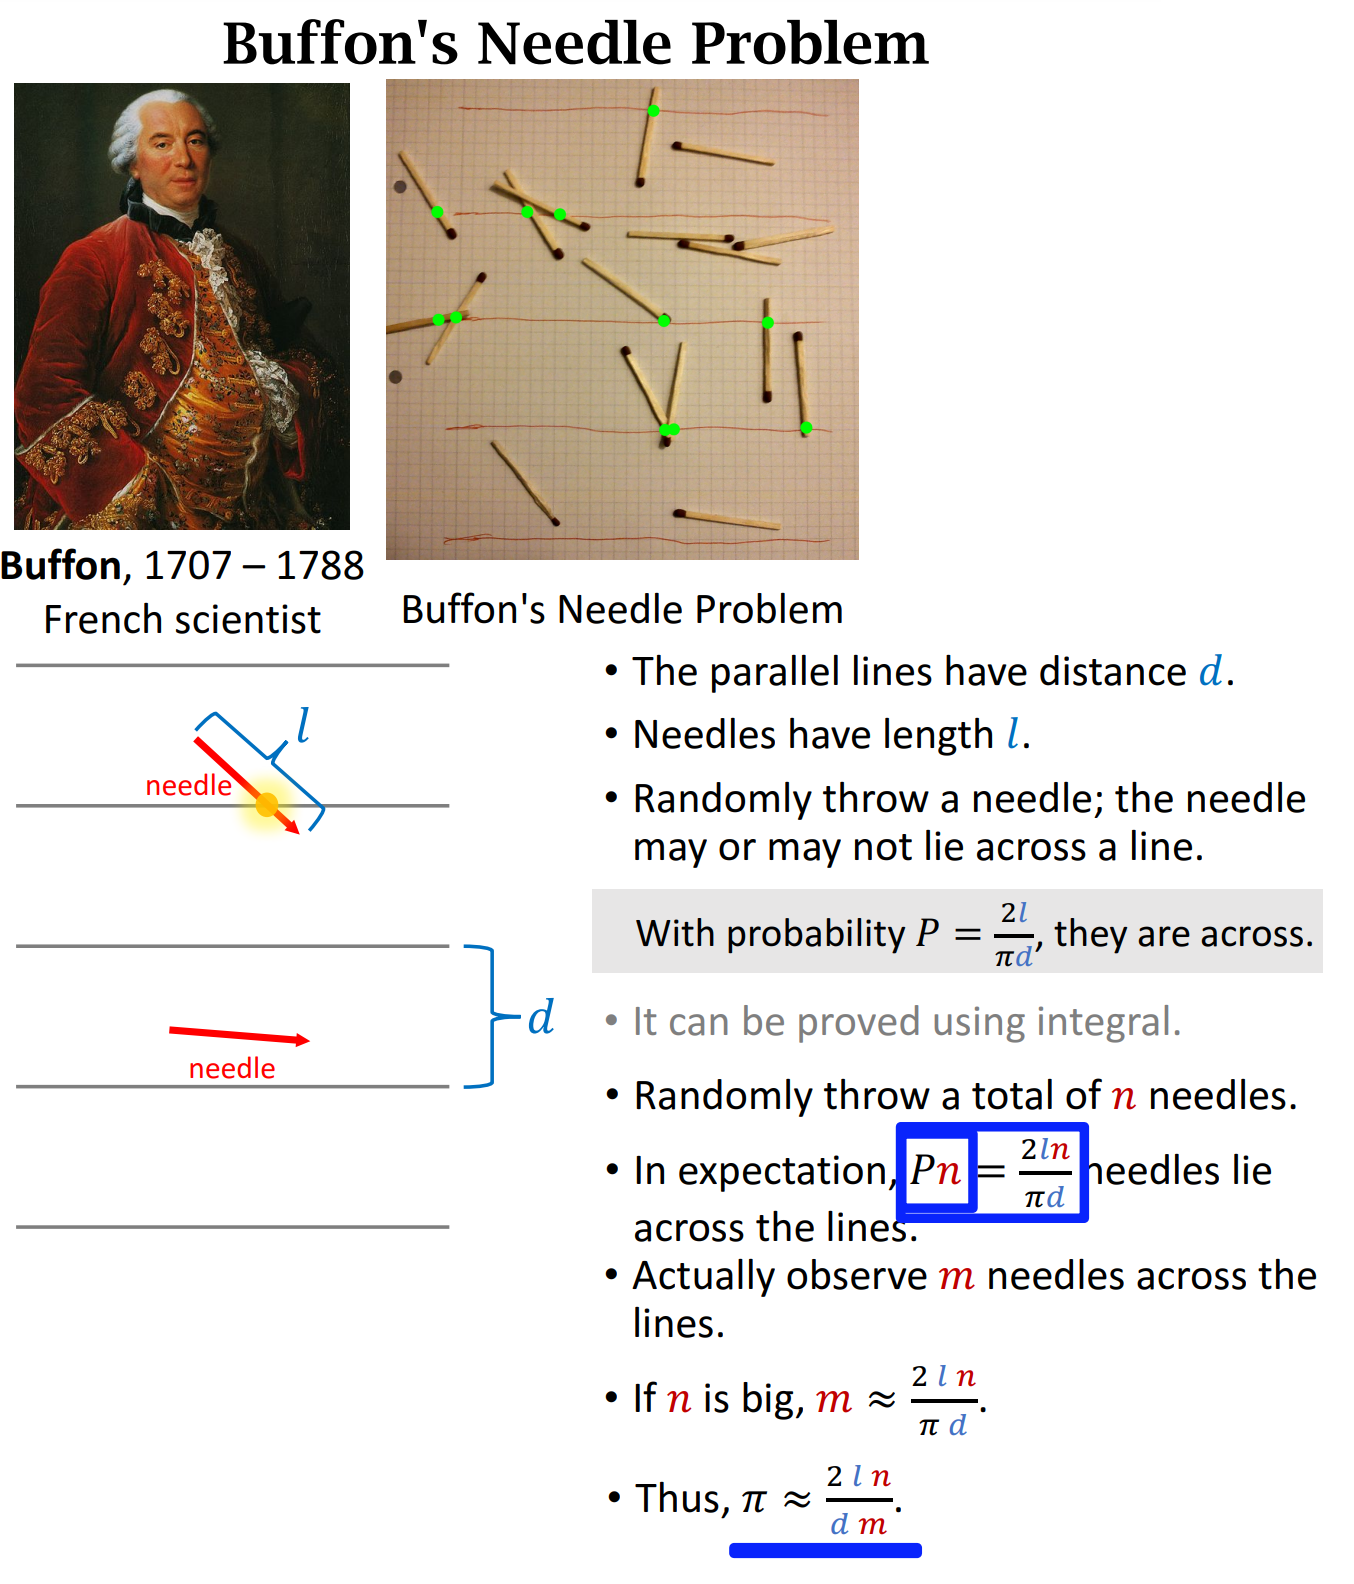

# 8. Application 3: Area of A Region

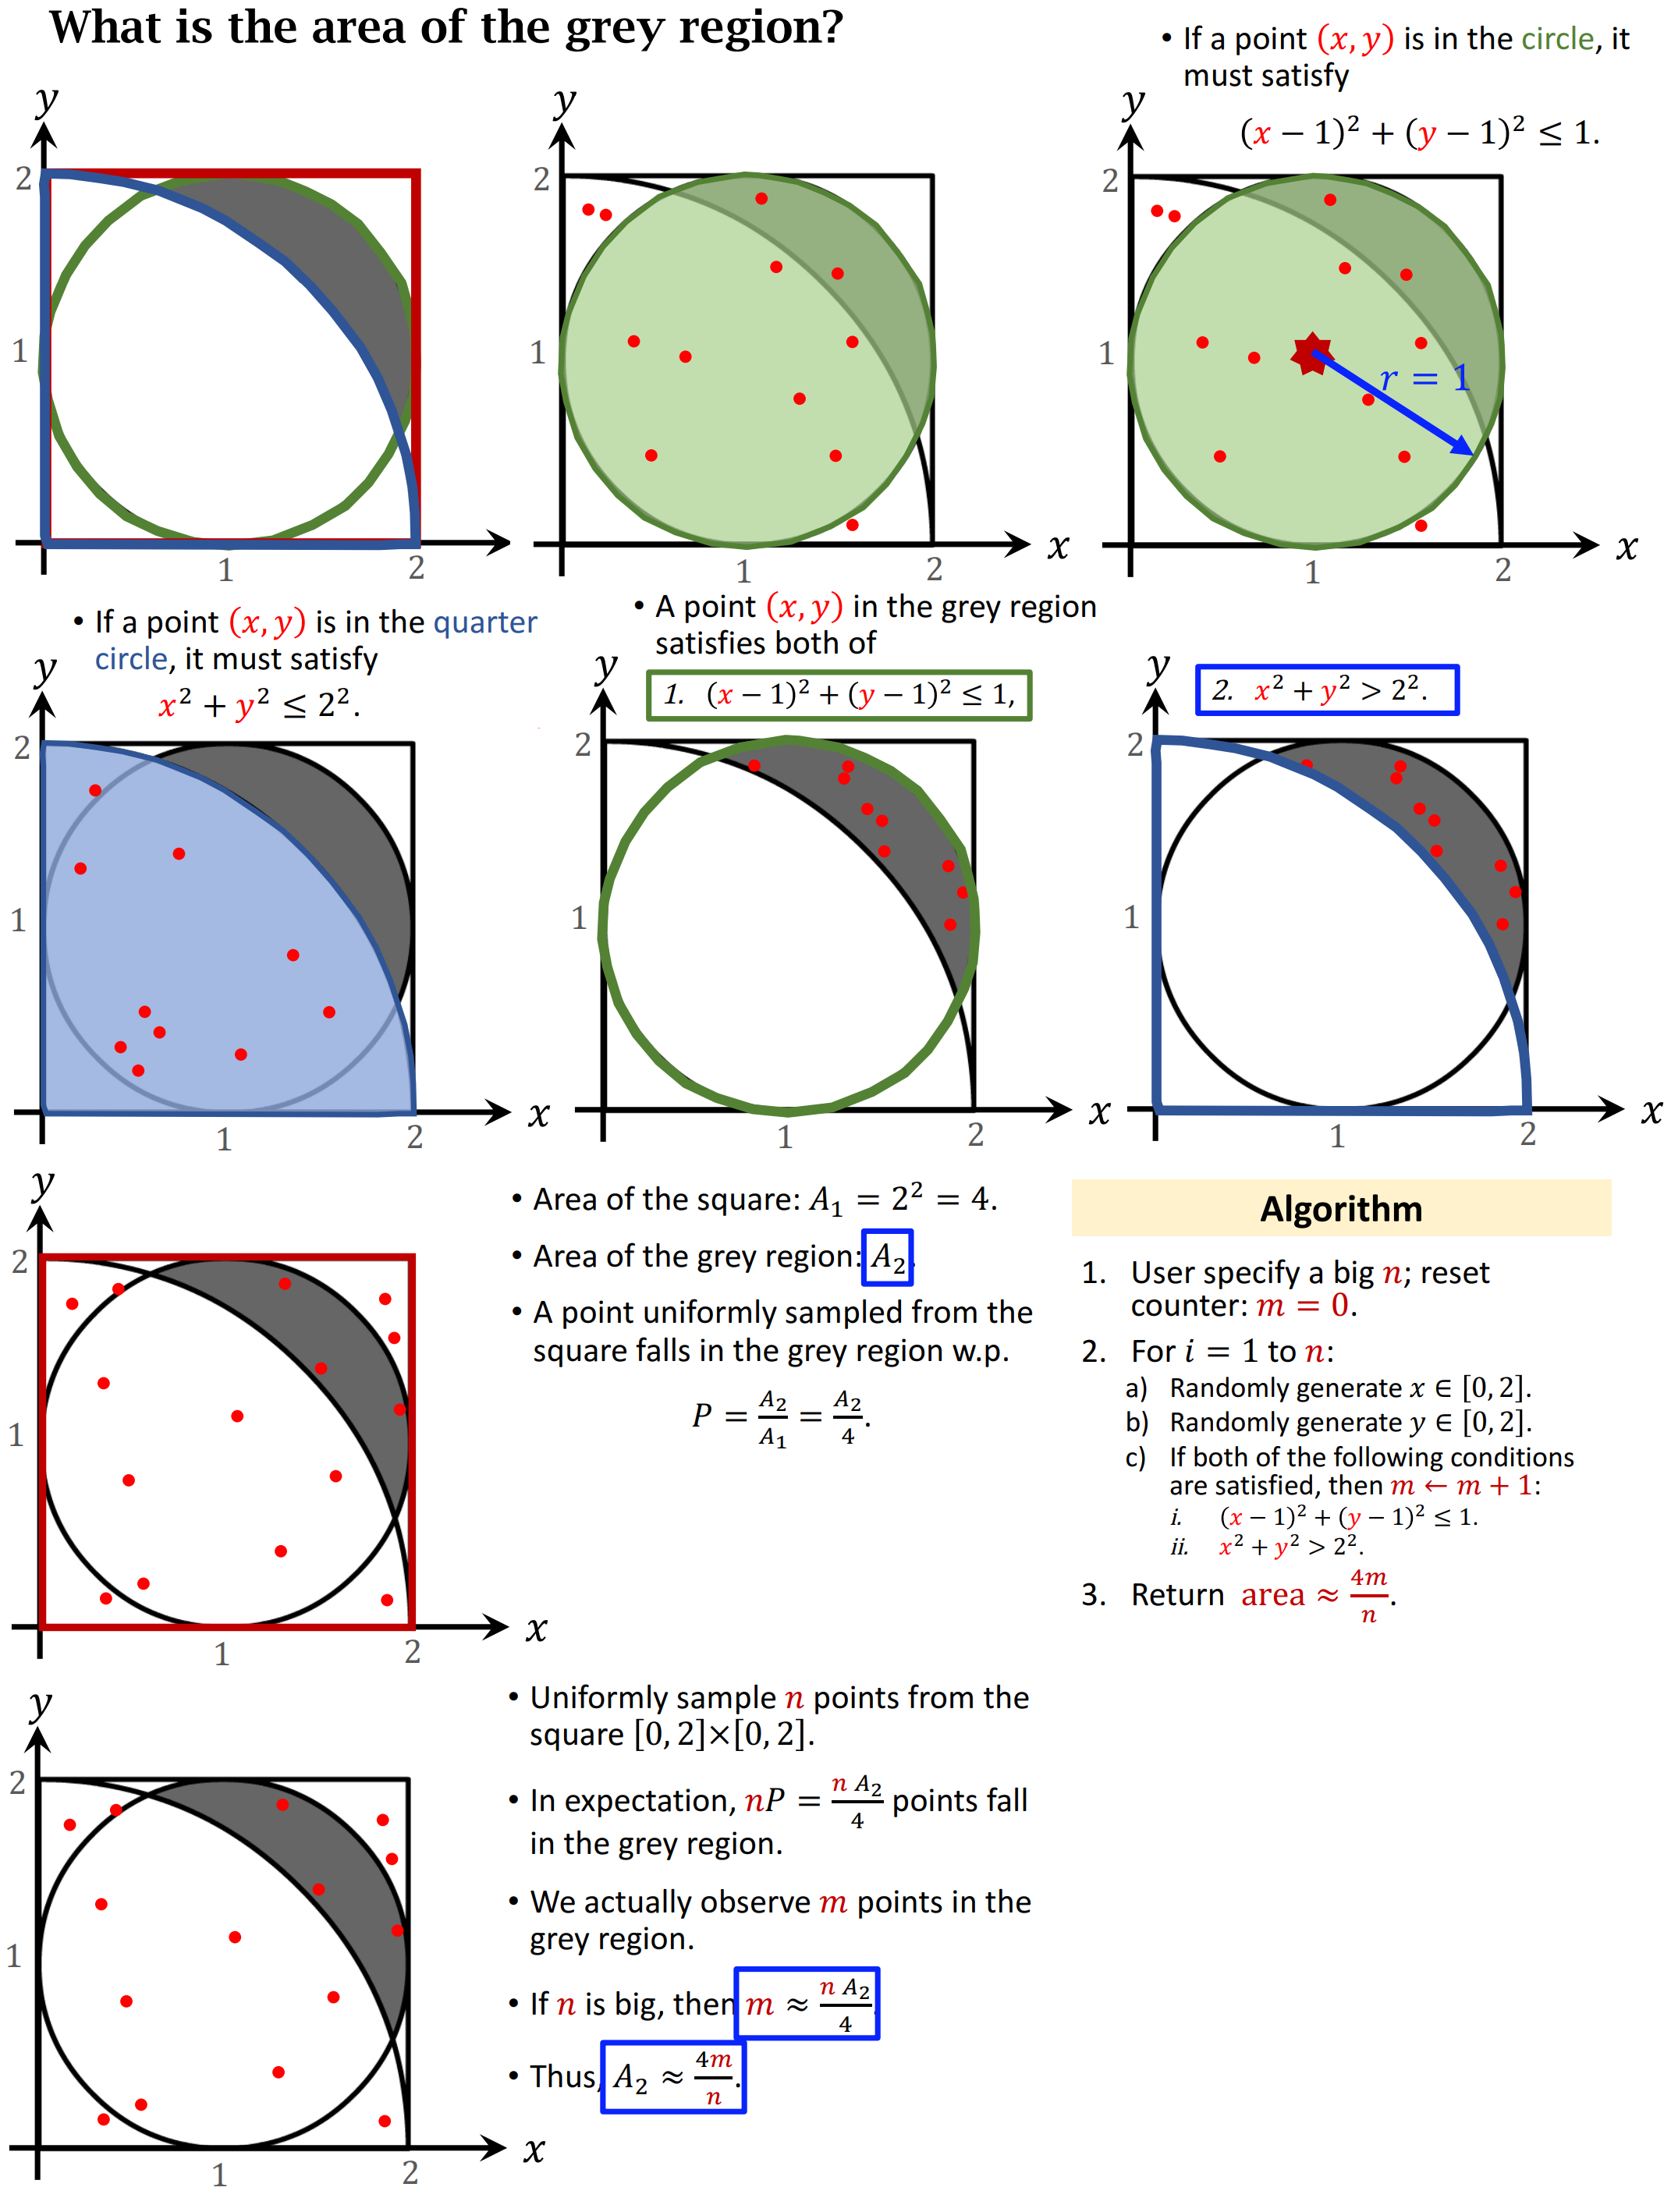

# 9. Application 4: Integration

- Integration

- Monte Carlo Integration (Univariate)

- Monte Carlo Integration (Univariate): Example

- Monte Carlo Integration (Multivariate)

- Monte Carlo Integration: Bivariate Example

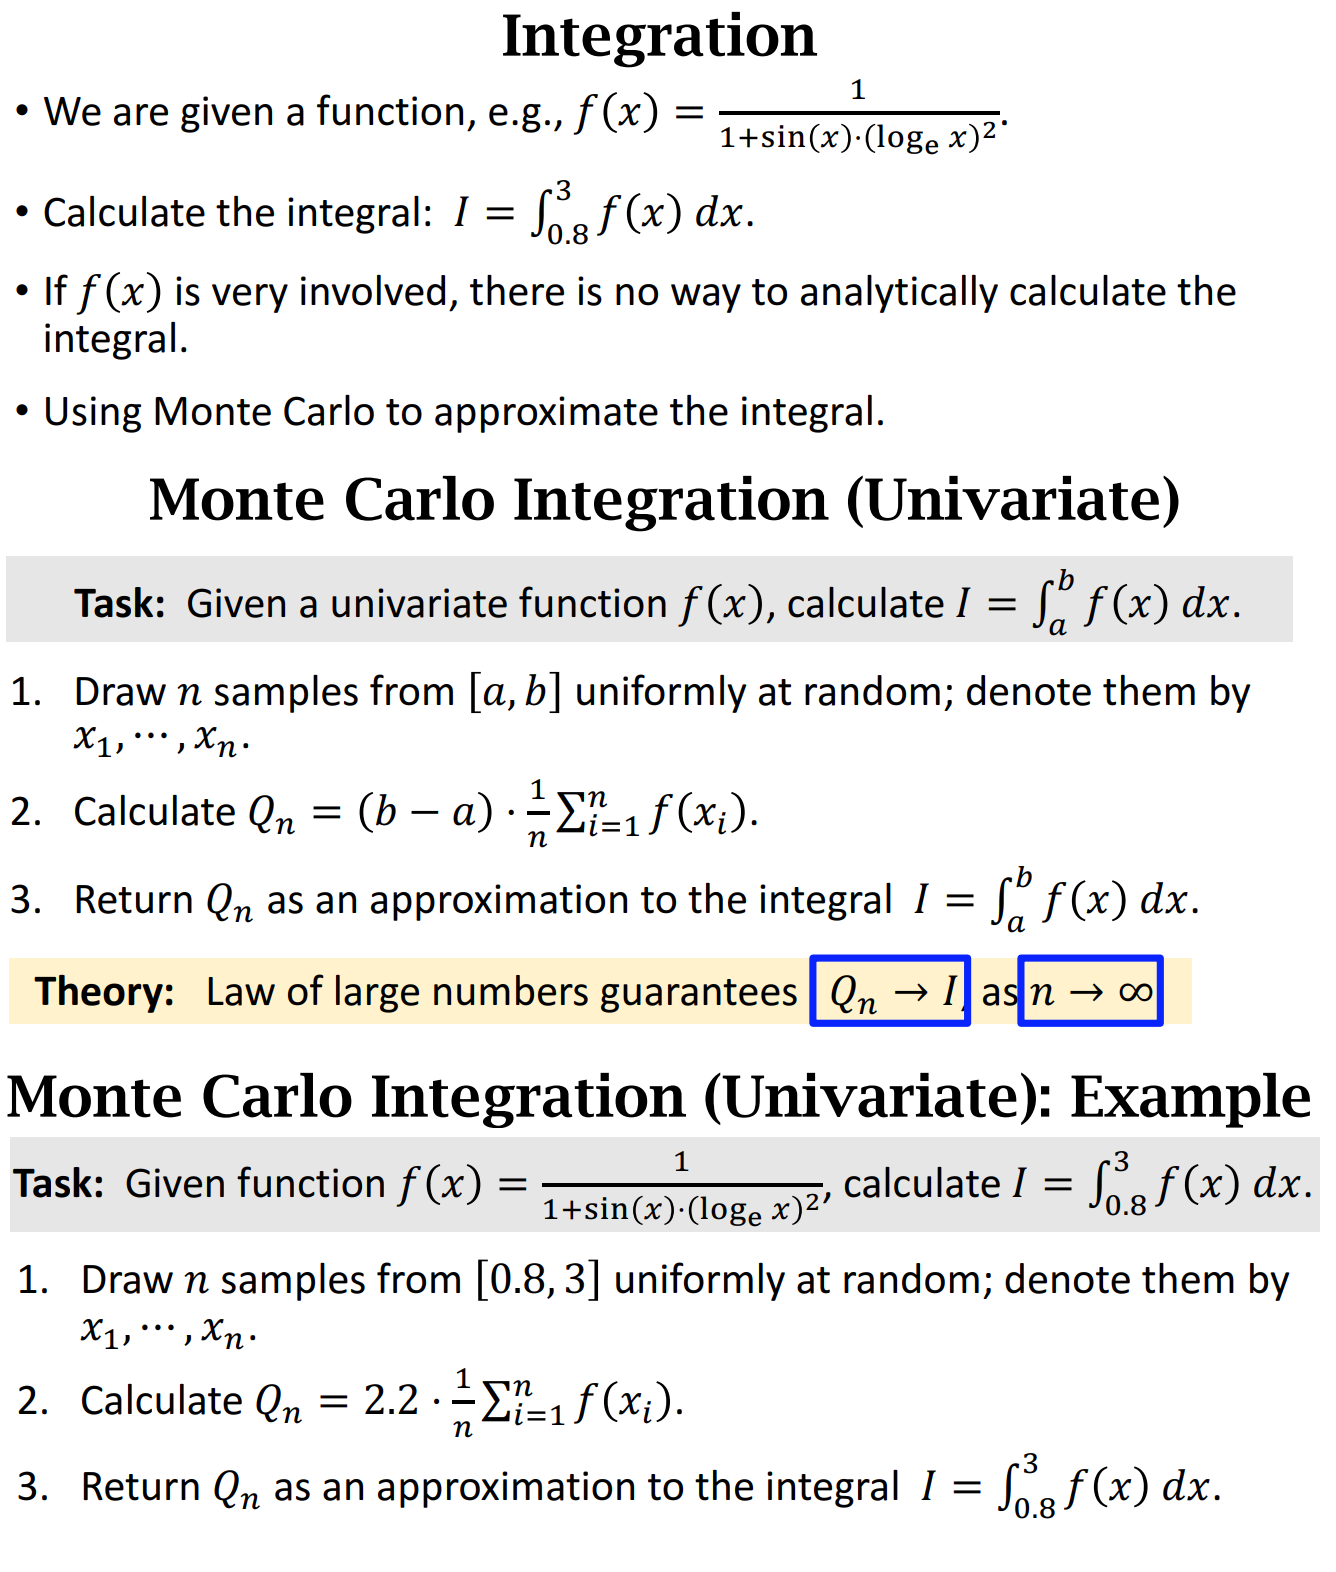

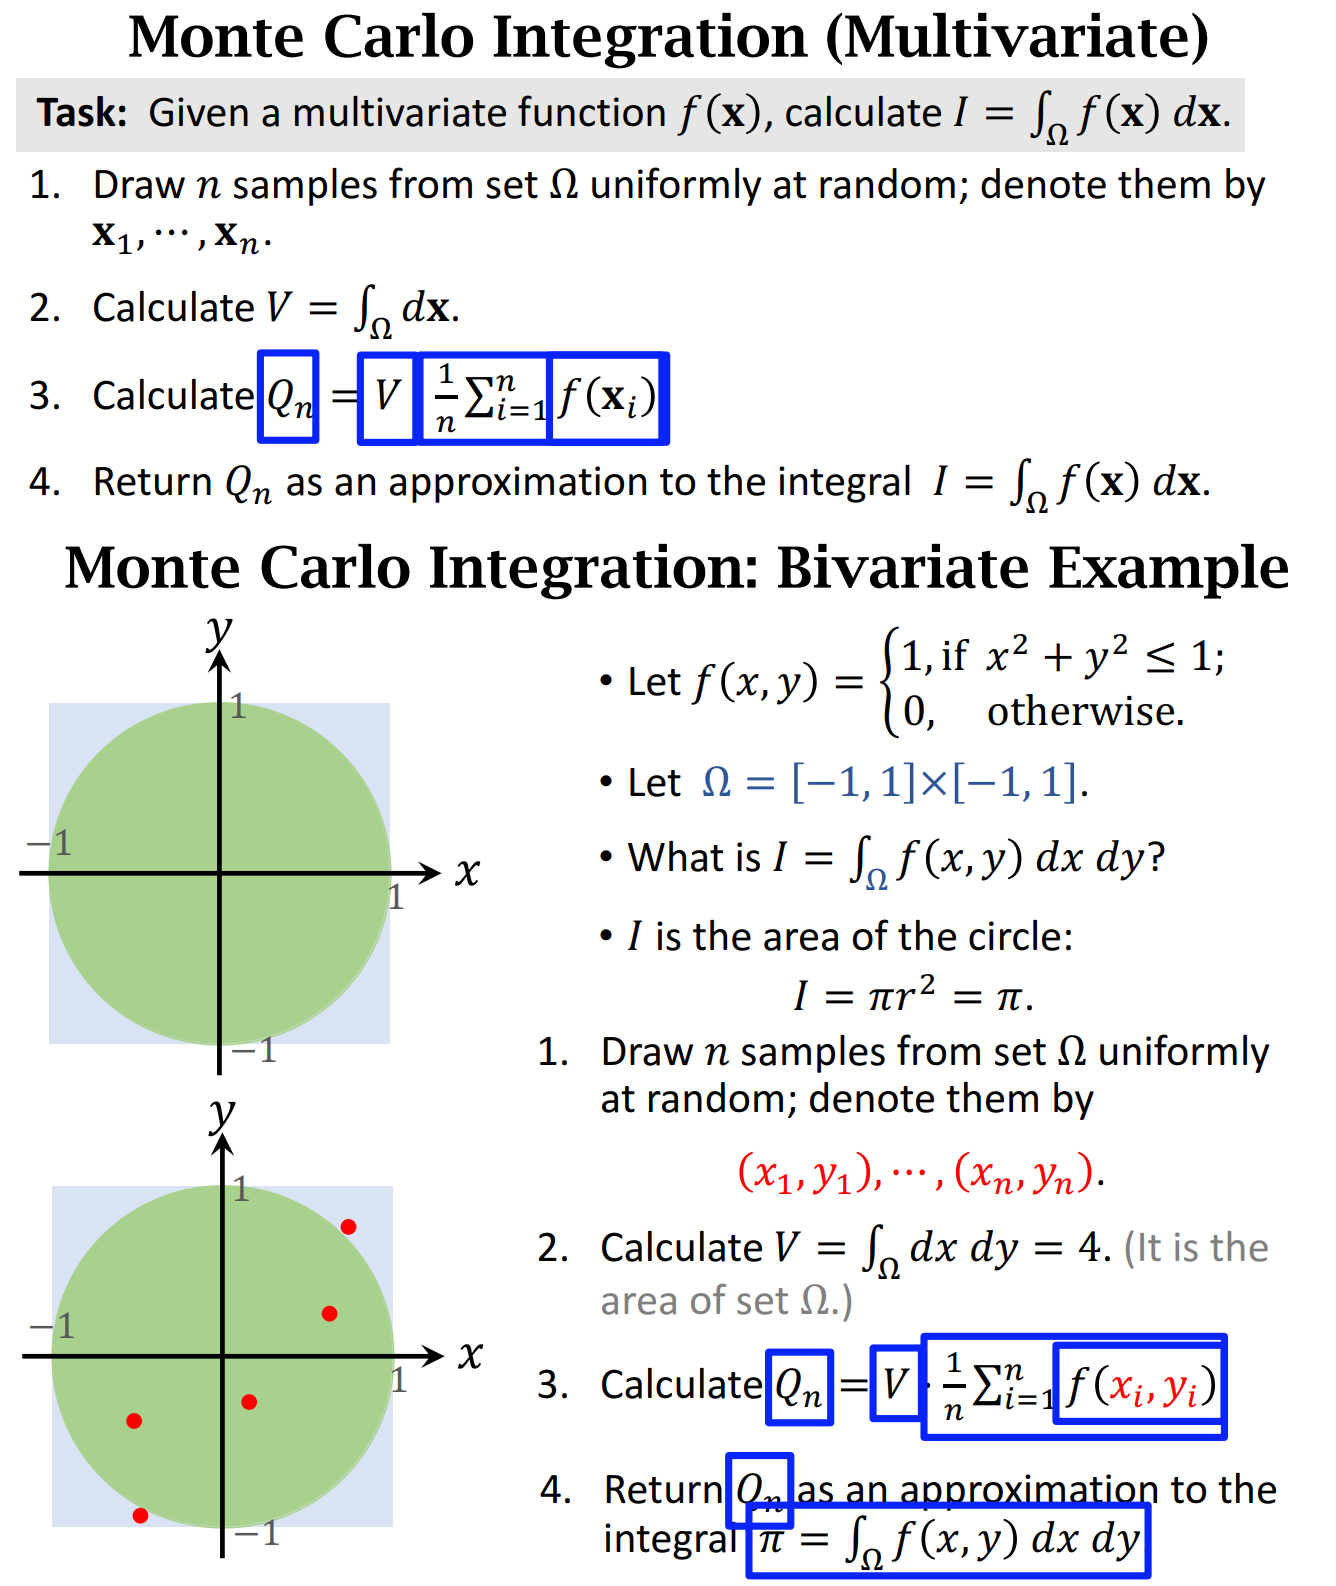

# 10. Application 5: Estimate of Expectation

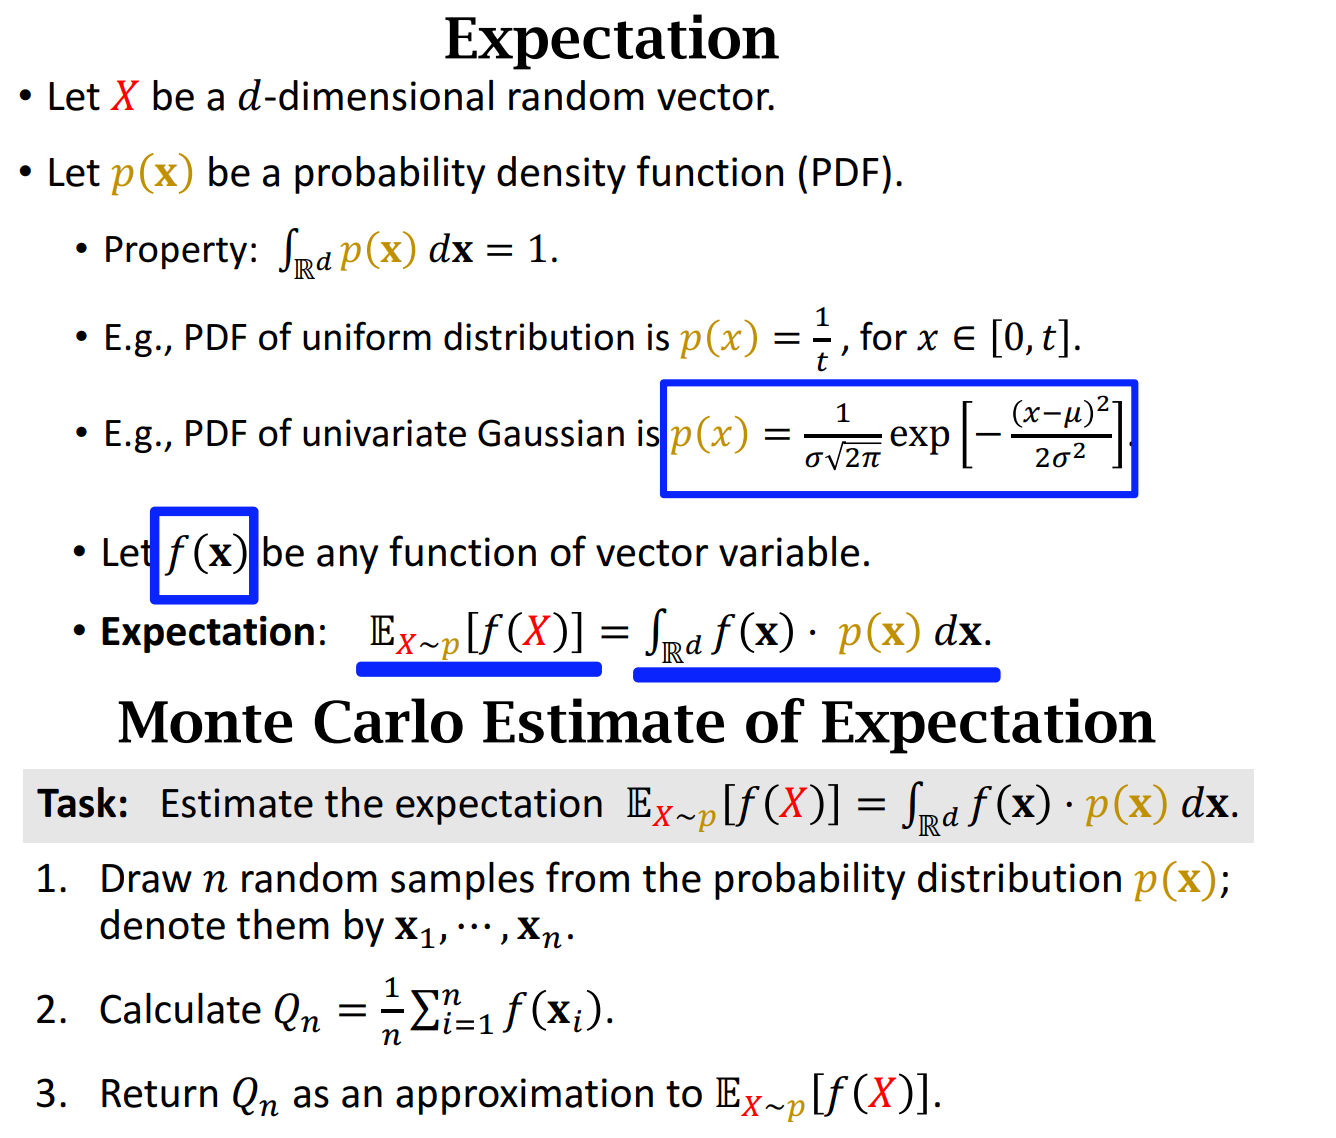

## Reference

1. MIT 6.0002 Introduction to Computational Thinking and Data - Monte Carlo Simulation : https://www.youtube.com/watch?v=OgO1gpXSUzU

2. 蒙特卡洛原理代码 monte carlo : https://blog.csdn.net/yjinyyzyq/article/details/86600393

3. 蒙特卡洛法高维数值积分： Vegas : https://zhuanlan.zhihu.com/p/264315872

4. 一文详解蒙特卡洛（Monte Carlo）法及其应用 : https://blog.csdn.net/qq_39521554/article/details/79046646

5. https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration

6. 蒙特卡罗方法详解 : https://zhuanlan.zhihu.com/p/369099011

7. https://zh.wikipedia.org/zh-tw/%E8%92%99%E5%9C%B0%E5%8D%A1%E7%BE%85%E6%96%B9%E6%B3%95

8. https://github.com/gplepage/vegas

9. https://vegas.readthedocs.io/en/latest/

10. https://arxiv.org/abs/2009.05112

11. vegas 原始文献：G. P. Lepage, J. Comput. Phys. 27(1978) 192.

## M1

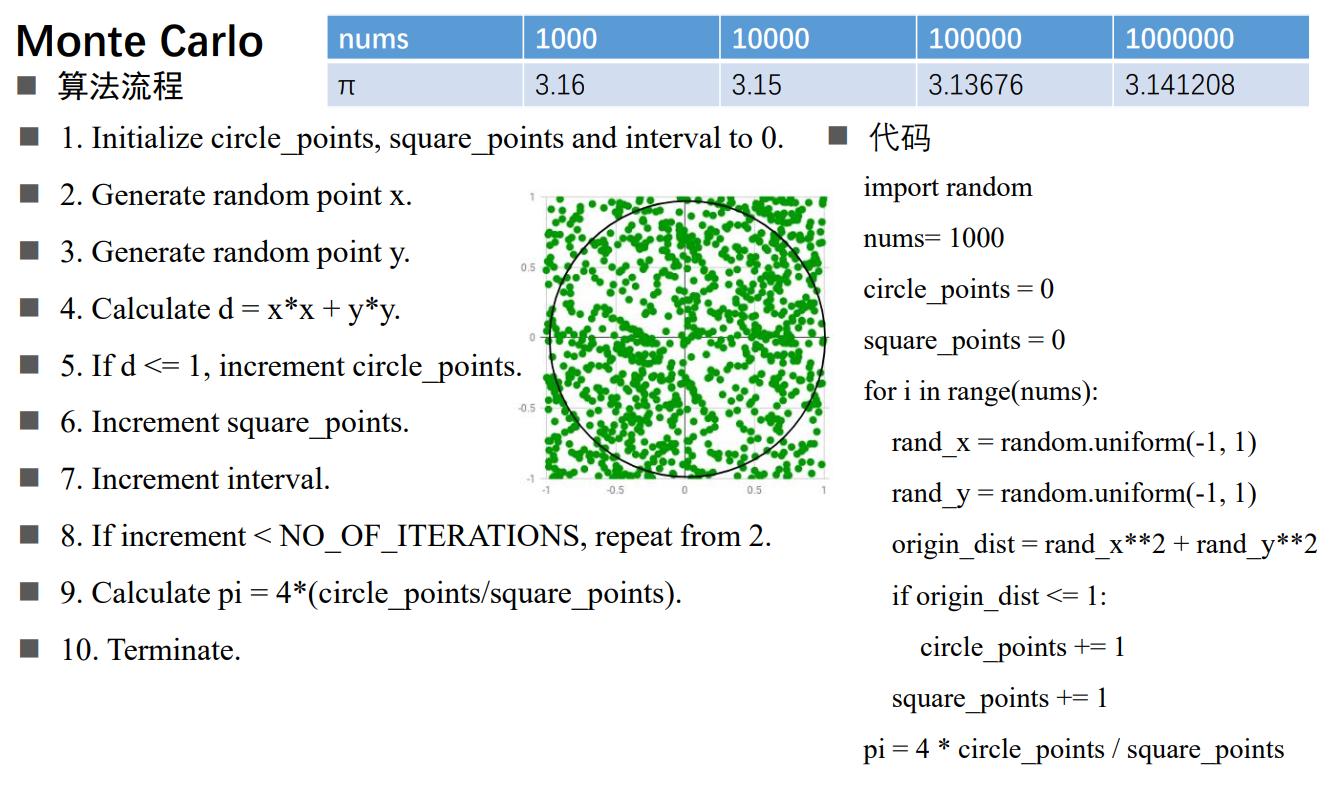

## M2

蒙特卡洛分析法（Monte Carlo method）（统计模拟法），是一种采用随机抽样（Random Sampling）统计来估算结果的计算方法，可用于估算圆周率，由约翰·冯·诺伊曼提出。由于计算结果的精确度很大程度上取决于抽取样本的数量，一般需要大量的样本数据，因此在没有计算机的时代并没有受到重视。

蒙特卡洛分析法利用正方形的面积跟正方形体内最大圆的面积比值为4：π，来求解 π 的值，假设给正方形内部随机仍石子，那么落在圆里面的概率为四分之π，当石子数量足够大的时候就可以精确的求出 π 的值

```
import random #引入随机数库
N = 1000*1000 #定义循环次数
list=0.0 #落入圆中的石子数量
for i in range(1,1+N):
    x = random.uniform(0,1) #模拟石子的随机坐标
    y = random.uniform(0,1)
    if (pow(x,2) + pow(y,2)) <= 1:
        list = list+1
print(4*(list/N)) #打出圆周率
```

## 结论

1、实验条件相同的情况下，每次结果并不一致，都有波动

2、实验条件不同的情况下，数据量越多，则每次结果的波动越小

3、实验条件不同的情况下，数据量越多，实验结果距离真实值的误差越小

## M3

由 Monte Carlo 方法估计出圆面积 S，再由 S = PI * r_{2} 计算出 PI

在边长 2r 的正方形中随机撒 N 个点，如果有 M 个落在内切圆中，则圆与正方形面积之比近似为M:N

$PI = 4 * \frac{M}{N}$

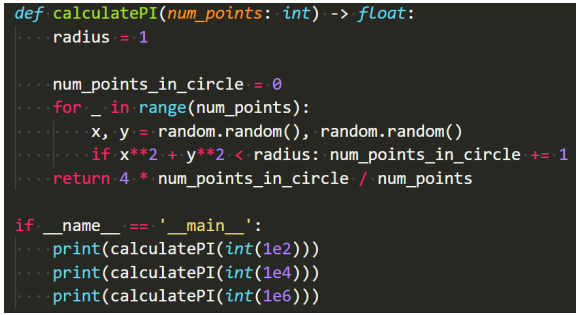

### 伪随机数

- 由确定性的算法计算出的随机数序列，循环周期极长

- 并非真正的随机数，计算时的初值不变，则结果数序也不变

- 但有着类似于随机数的统计特征，如均匀性、独立性等

### 生成方法

- 线性同余

- 平方取中

- 量子随机发生器

### 伪随机数质量评价

Bundesamt für Sicherheit in der Informationstechnik

- A sequence of random numbers with a low probability of containing identical consecutive elements.

- A sequence of numbers which is indistinguishable from 'true random' numbers according to specified statistical tests.

- It should be impossible for any attacker (for all practical purposes) to calculate, or otherwise guess, from any given sub-sequence, any previous or future values in the sequence, nor any inner state of the generator.

- It should be impossible, for all practical purposes, for an attacker to calculate, or guess from an inner state of the generator, any previous numbers in the sequence or any previous inner generator states.

### Python 中的伪随机数

MT19937

Mersenne Twister: 周期长度通常取 Mersenne 质数

速度快，周期长(可达 $2^{19937} − 1$)， 623 维均匀分布

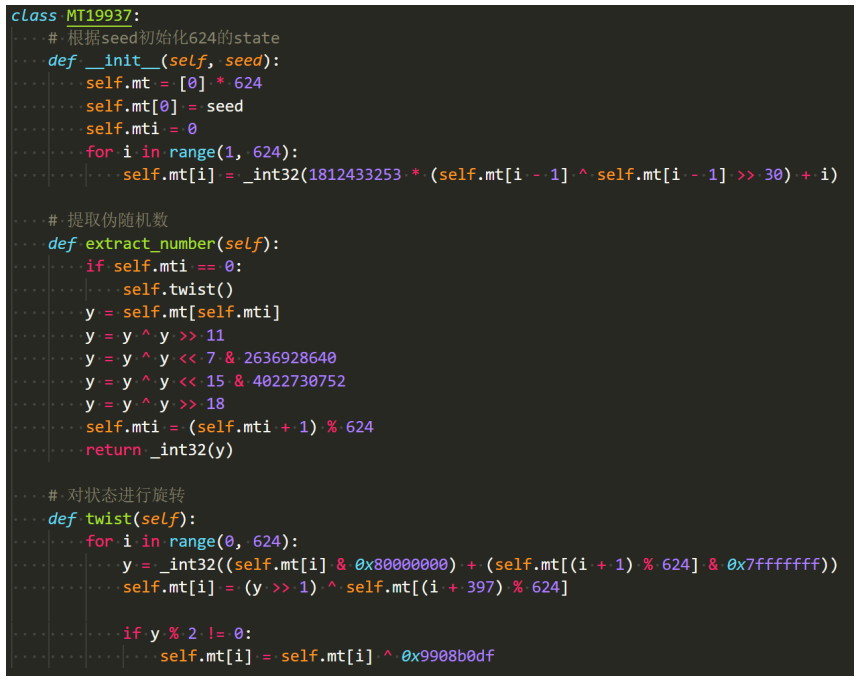


## M4

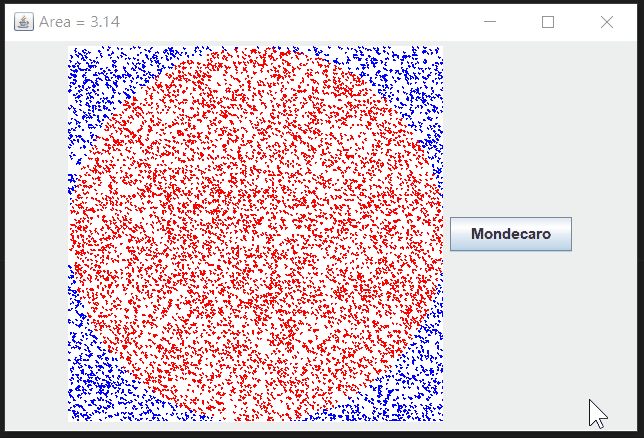

```
import javax.swing.*;
import javax.swing.event.*;
import java.awt.*;
import java.awt.event.*;
import java.util.Random;
public class Mondecaro extends JFrame implements ActionListener {
    private JButton button;
    private JPanel panel;
    private int height = 300, width = 300;
    public static void main (String[] argv) {
        Mondecaro frame = new Mondecaro();
        frame.setSize(520, 350);
        frame.createGUI();
        frame.setVisible(true);
    }
    private void createGUI() {
        setDefaultCloseOperation(EXIT_ON_CLOSE);
        Container window = getContentPane();
        window.setLayout(new FlowLayout());
        panel = new JPanel();
        panel.setPreferredSize(new Dimension(width, height));
        panel.setBackground(Color.white);
        window.add(panel);
        button = new JButton("Mondecaro");
        window.add(button);
        button.addActionListener(this);
    }
    public void actionPerformed(ActionEvent e) {
        draw();
    }
    private void draw() {
        Graphics paper = panel.getGraphics();
        paper.setColor(Color.white);
        paper.fillRect( 0, 0, width, height);
        paper.setColor(Color.black);
        int px = width, py = height / 2;
        Random random = new Random ();
        int n = width / 2, in = 0, N = 10000;
        for (int i = 1; i <= N; i++) {
            int x = random.nextInt(width);
            int y = random.nextInt(width);
            double dist = Math.sqrt(Math.pow(x - n, 2) + Math.pow(y - n, 2));
            if (dist < n) {
                paper.setColor(Color.red);
                in++;
            } else {
                paper.setColor(Color.blue);
            }
            paper.drawOval( x, y, 1, 1);
            setTitle("Area = " + (double)in / i * 4);
            for (int k = 0; k < 1000; k++); 
        }
    }
}
```

In [1]:
import random
total = [10, 100, 1000, 10000, 100000, 1000000, 5000000]  #随机点数
for t in total:
    in_count = 0
    for i in range(t):
        x = random.random()
        y = random.random()
        dis = (x**2 + y**2)**0.5
        if dis<=1:
            in_count += 1
    print(t,'个随机点时，π 是：', 4 * in_count/t)

10 个随机点时，π 是： 3.2
100 个随机点时，π 是： 2.84
1000 个随机点时，π 是： 3.056
10000 个随机点时，π 是： 3.11
100000 个随机点时，π 是： 3.13244
1000000 个随机点时，π 是： 3.142388
5000000 个随机点时，π 是： 3.1407064


蒙特卡罗方法是一种计算方法。原理是通过大量随机样本，去了解一个系统，进而得到所要计算的值。
 
它非常强大和灵活，又相当简单易懂，很容易实现。对于许多问题来说，它往往是最简单的计算方法，有时甚至是唯一可行的方法。它诞生于上个世纪 40 年代美国的"曼哈顿计划"，名字来源于赌城蒙特卡罗，象征概率。

通常蒙特卡罗方法可以粗略地分成两类：

一类是所求解的问题本身具有内在的随机性，借助计算机的运算能力可以直接模拟这种随机的过程。例如在核物理研究中，分析中子在反应堆中的传输过程。中子与原子核作用受到量子力学规律的制约，人们只能知道它们相互作用发生的概率，却无法准确获得中子与原子核作用时的位置以及裂变产生的新中子的行进速率和方向。科学家依据其概率进行随机抽样得到裂变位置、速度和方向，这样模拟大量中子的行为后，经过统计就能获得中子传输的范围，作为反应堆设计的依据。

另一种类型是所求解问题可以转化为某种随机分布的特征数，比如随机事件出现的概率，或者随机变量的期望值。通过随机抽样的方法，以随机事件出现的频率估计其概率，或者以抽样的数字特征估算随机变量的数字特征，并将其作为问题的解。这种方法多用于求解复杂的多维积分问题。

### π 的计算

第一个例子是，如何用蒙特卡罗方法计算圆周率π。正方形内部有一个相切的圆，它们的面积之比是 π/4

现在，在这个正方形内部，随机产生 10000 个点（即 10000 个坐标对 (x, y)），计算它们与中心点的距离，从而判断是否落在圆的内部。

如果这些点均匀分布，那么圆内的点应该占到所有点的 π/4，因此将这个比值乘以4，就是π的值。通过R语言脚本随机模拟30000个点，π的估算值与真实值相差0.07%。

In [2]:
import numpy as np
import tqdm
#random_generate = np.random.uniform(low=0.0, high=2.0, size=(1, 1))

#求解 pi
sum = 0
for i in tqdm.tqdm(range(3000000)):
        #random_generate = np.random.rand(2
        random_generate = np.random.uniform(low=0.0, high=2.0, size=(2))
        if np.sum(np.square(random_generate-np.array([1.0, 1.0]))) <=1:
                sum += 1
print(sum)
pi = 4 * (sum / 3000000)
print('pi is:{}'.format(pi))


100%|██████████| 3000000/3000000 [03:34<00:00, 13994.75it/s]

2357781
pi is:3.143708


### 蒙特卡罗方法求定积分

比如积分 $\theta=\int_{a}^{b} f(x) d x$ ，如果f(x)的原函数很难求解，那么这个积分也会很难求解。

而通过蒙特卡罗方法对其进行模拟求解的方式有二。

1. 随机投点法

这个方法和上面的两个例子的方法是相同的。如图所示，有一个函数f(x)，要求它从a到b的定积分，其实就是求曲线下方的面积：

这时可以用一个比较容易算得面积的矩型罩在函数的积分区间上（假设其面积为 Area），然后随机地向这个矩形框里面投点，其中落在函数f(x)下方的点为绿色，其它点为红色，然后统计绿色点的数量占所有点（红色+绿色）数量的比例为r，那么就可以据此估算出函数f(x)从 a 到 b 的定积分为 Area × r。

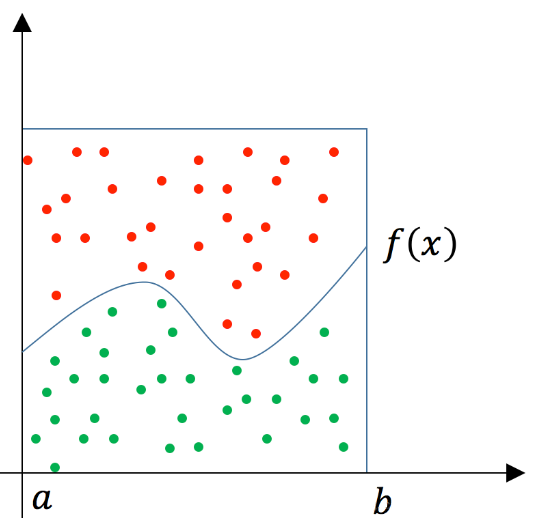

In [3]:
# 求解定积分 x^2 区间[1, 2]; 投点法
import numpy as np
import tqdm
sum = 0
for i in tqdm.tqdm(range(3000000)):

        random_generate = np.array([np.random.uniform(1, 2), np.random.uniform(0, 4)])
        if np.square(random_generate[0]) > random_generate[1]:
                sum += 1
print(sum)
area = 4 * sum / 3000000
print('Area is:{}'.format(area))

100%|██████████| 3000000/3000000 [01:45<00:00, 28409.62it/s]

1749610
Area is:2.332813333333333


2. 平均值法 (期望法)

如下图所示，在 [a,b] 之间随机取一点 x 时，它对应的函数值就是 f(x)，我们要计算 $\theta=\int_{a}^{b} f(x) d x$，就是图中阴影部分的面积。

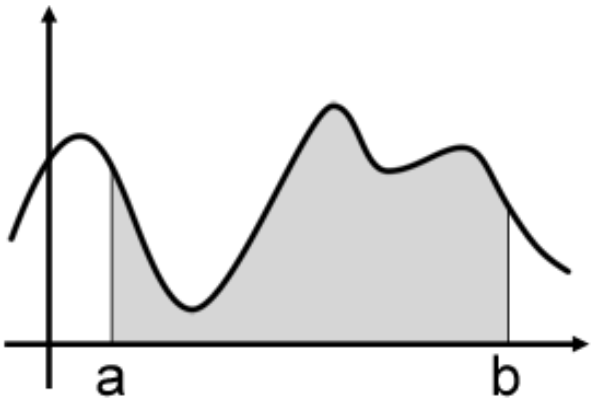

一个简单的近似求解方法就是用 $f(x) *(b-a)$ 来粗略估计曲线下方的面积，在 [a,b] 之间随机取点 x，用 f(x) 代表在 [a,b] 上所有 f(x) 的值，如下图所示：

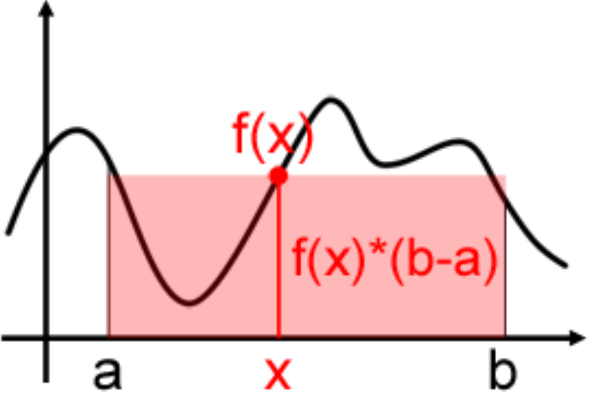

用一个值代表 [a,b] 区间上所有的 ( ) 的值太粗糙了，我们可以进一步抽样更多的点，比如下图抽样了四个随机样本 $x_{1}, x_{2}, x_{3}, x_{4} $ (满足均匀分布)，每个样本都能求出一个近似面积值 $f(x_{i}) * (b - a)$ ，然后计算他们的数学期望，就是蒙特卡罗计算积分的平均值法了。

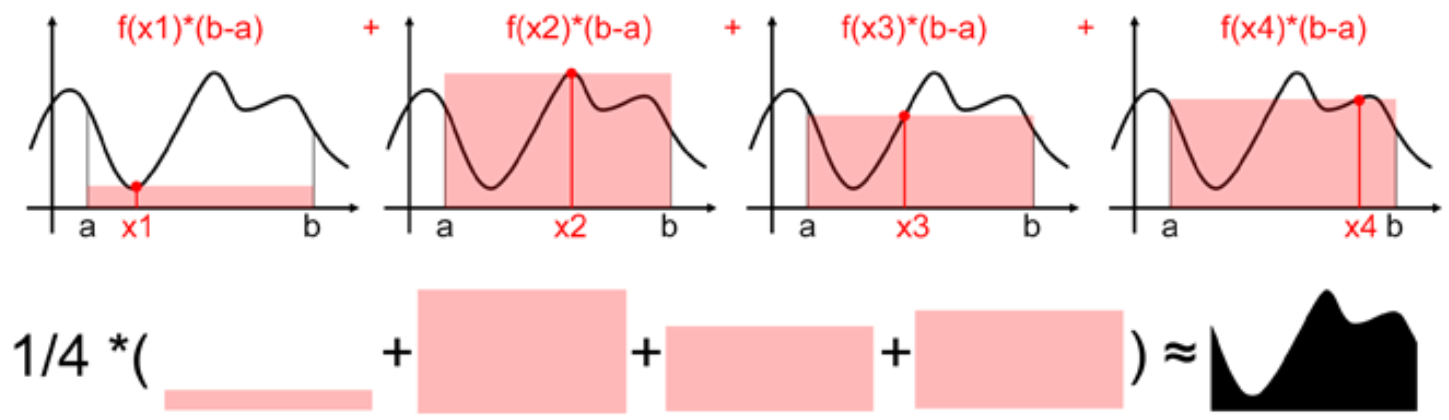

用数学公式表述上述过程：

$S = \frac{1}{4} [f(x_{1})(b - a) + f(x_{2})(b - a) + + f(x_{3})(b - a) + + f(x_{4})(b - a)] = \frac{1}{4} (b - a)(f(x_{1}) + f(x_{2}) + f(x_{3}) + f(x_{4})) = \frac{1}{4} (b - a)\sum_{i=1}^{4} f(x_{i}) $

然后进一步我们采样 n 个随机样本 (满足均匀分布)，则有：

$S = \frac{b - a}{n} \sum_{i=1}^{n} f(x_{i})\simeq \theta$

采样点越多，估计值也就越来越接近。

上面的方法是假定 x 在 [a,b] 间是均匀分布的，而大多时候 x 在 [a,b] 上不是均匀分布的，因此上面方法就会存在很大的误差。

这时我们假设x在[a,b]上的概率密度函数为 $p(x)$ ，加入到 $\theta=\int_{a}^{b} f(x) d x$ 中变换为：

 $\theta=\int_{a}^{b} f(x) d x = \int_{a}^{b} \frac{f(x)}{p(x)} p(x) d x \simeq \frac{1}{n} \sum_{i=1}^{n} \frac{f(x_{i})}{p(x_{i})}$

这就是蒙特卡罗期望法计算积分的一般形式。那么问题就换成了如何从 $p(x)$ 中进行采样。

In [4]:
# 求解定积分 X^2 区间 [1， 2]; 平均法
import numpy as np
import tqdm
sum = 0
for i in tqdm.tqdm(range(3000000)):
        random_x = np.random.uniform(1, 2, size=None)
        # None 是默认的也可以不写
        a =  np.square(random_x)
        sum += a*(2-1)
area = sum/3000000
print('calculate by mean_average:{}'.format(area))

100%|██████████| 3000000/3000000 [00:54<00:00, 54710.70it/s]

calculate by mean_average:2.3338658197606774


### 蒙特卡洛法高维数值积分 Vegas

高能物理研究经常要用到高维函数的数值积分。传统的数值积分方法，比如梯形公式，辛普森积分，Gauss Quadrature 已经统统失效。原因很简单，那些算法每个维度需要至少 M 个离散的数据点，对于 N 维积分，需要在 $M^{N}$ 个点上计算函数取值。

比如 10 维积分，每个维度用最节省的 15 个点的 Gauss Quadrature，需要计算的函数值的次数也达到了 $M^{N} = 15^{10} = 576650390625$ 约 5766 亿次。

出现这种情况一般称作维数灾难。

在此使用蒙特卡洛积分算法 Vegas 做高维数值积分，而 Python 的 Vegas 库的安装以及 Vegas 蒙卡积分的原理如下。

1. VEGAS 高维函数蒙特卡洛积分

安装 vegas 库很简单，在命令行使用如下命令

```
pip install vegas
```

计算如下 4 维高斯函数

$f(x_{0}, x_{1}, x_{2}, x_{3}) = N exp( - \sum_{i=0}^{3} (x_{i} - \frac{1}{2})^{2} / 0.01 )$

在闭区间 $x_{0} \in [-1, 1], x_{1} \in [0, 1], x_{2} \in [0, 1], x_{3} \in [0, 1]$

上的数值积分。其中 N = 1013.211 是一个归一化因子。

In [5]:
# copy and paste to test.py
import vegas
import math

def f(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return math.exp(-dx2 * 100.) * 1013.2118364296088

integ = vegas.Integrator([[-1, 1], [0, 1], [0, 1], [0, 1]])

result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.297(94)       0.297(94)           0.00     1.00
  2   0.678(94)       0.488(66)           8.24     0.00
  3   1.11(11)        0.653(57)          15.69     0.00
  4   0.957(62)       0.792(42)          14.81     0.00
  5   1.002(38)       0.906(28)          14.54     0.00
  6   0.976(27)       0.943(19)          12.27     0.00
  7   1.007(20)       0.975(14)          11.11     0.00
  8   1.013(16)       0.991(10)          10.00     0.00
  9   0.982(14)       0.9880(84)          8.79     0.00
 10   0.999(12)       0.9917(69)          7.88     0.00

result = 0.9917(69)    Q = 0.00


可以看到 result.summary() 返回了 10 次迭代的结果。

如果只想返回最终结果，去掉 summary(),

EX : result = 1.0101(93)

result 是一个 gvar 类型的数，括号里的数表示误差

- 使用 result.mean 返回均值 1.0101

- 使用 result.sdev 返回不确定部分 0.0093

如果积分变量 x[1] 的积分上限依赖积分变量 x[0], 如

$\int_{0}^{1} d x_{0} \int_{0}^{x_{0}} d x_{1} \sin(x_{0}x_{1})$

被积函数可以这样写

In [6]:
def f(x):
    if x[1] > x[0]: return 0
    return sin(x[0]*x[1])

2. 蒙特卡洛积分 - 重要抽样法

这里忽略黎曼积分的适用性以及勒贝格积分的优越性讨论，来自 Mathematica 关于黎曼求和、黎曼积分的例子

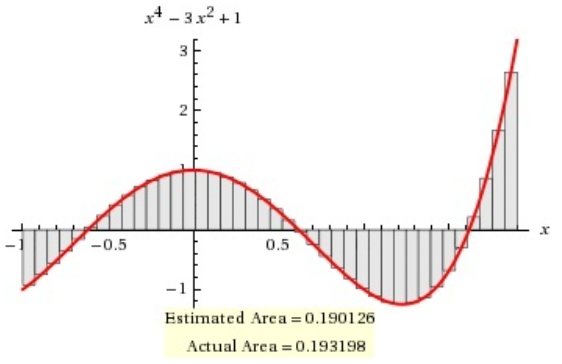

黎曼积分 原理指导我们，为了求一维函数 f(x) 在闭区间 [a, b] 上的定积分，可以先把区间分成 n 份， $a<x_{1}<x_{2}<\cdots<x_{n-1}<b$  , 其中格子大小为 $\Delta x_{i}=x_{i+1}-x_{i}$ 。

函数的积分近似等于小格子中任一处的函数值 $f\left(x_{i}^{*}\right)$ 乘以 $\Delta x_{i}$ ，并对所有格子求和。

$F \approx \sum_{i} f\left(x_{i}^{*}\right) \Delta x_{i}$

因此可以使用均匀分布抽样出的 $x_{i}$ 点上函数值 $f(x_{i})$ 乘以平均间距 $\frac{x_{max}-x_{min}}{N}$ 求和来近似黎曼积分。


$F=\int_{x_{\min }}^{x_{\max }} f(x) d x \approx \frac{x_{\max }-x_{\min }}{N} \sum_{i=1}^{N} f\left(x_{i}\right)$


如果是高维积分，只需要把右边的 $x_{max} - x_{min}$ 换成体积 $\mathcal{V}$ , 积分公式变为，

$F \approx \frac{\mathcal{V}}{N} \sum_{i}^{N} f\left(x_{i}\right) \approx \mathcal{V} \mathrm{E}\left[f\left(x_{i}\right)\right] $

其中 $\mathrm{E}[f]$ 表示 $f$ 在均匀分布下的期望值。

马文淦的《计算物理》中介绍，根据中心极限定理，因为 F 是大量随机变量 $f(x_{i})$ 的求和，它的值满足正态分布。

蒙卡积分的误差 $\propto \frac{\sigma\left(f_{x_{i}}\right)}{\sqrt{n}}$ ，因此有两种办法可以提高蒙特卡洛积分的精度。

第一种是多撒点，将撒点个数 $n$ 每增加 100 倍，蒙卡积分的误差就会减小为原来的十分之一。这个结论独立于积分的维数。

第二种是减小 $x_{i}$ 点上集合 $\left\{f\left(x_{i}\right)\right\}$ 的涨落 $\propto (f x_{i})$ 。


如果 $f(x) = c$ 是常数，则集合 $\left\{f\left(x_{i}\right)\right\}$ 的方差最小，为 $\sigma^{2}=\left\langle(f-\langle f\rangle)^{2}\right\rangle=0$ 。

当 $f(x)$ 偏离均匀分布，在局部有很尖的峰，则集合  $\left\{f\left(x_{i}\right)\right\}$ 的方差 (涨落) 就会比较大。

减小被积函数方差的方法是选择一个与 $f(x)$ 形式相近，但比较好抽样的函数 $g(x)$, 将积分写为，

$F=\int_{\mathcal{V}} \frac{f(x)}{g(x)} g(x) d x=\mathcal{V} \mathbb{E}_{g}\left[\frac{f(x)}{g(x)}\right] $

其中期望值 $\mathbb{E}_{g}$ 表示按照概率密度函数 $g(x)$ 抽样出一系列点 $x_{i}$ ，并使用这些点计算 $f(x)/g(x)$ 的均值，

$\frac{1}{N} \sum_{i}^{N} \frac{f\left(x_{i}\right)}{g\left(x_{i}\right)}$

此时，因为 $f(x) ~ g(x)$ ，被积函数 $f(x)/g(x) ~ 1$ 接近常数， $\left\{f\left(x_{i}\right) / g\left(x_{i}\right) \right\}$ 方差更小，从理论上降低蒙卡积分的误差。

与暴力增加 n 相比， $g(x)$ 函数的具体形式依赖于被积函数。

Vegas 积分就是要使用适配的方式，自动寻找 g(x)。


# 2. 近似算法

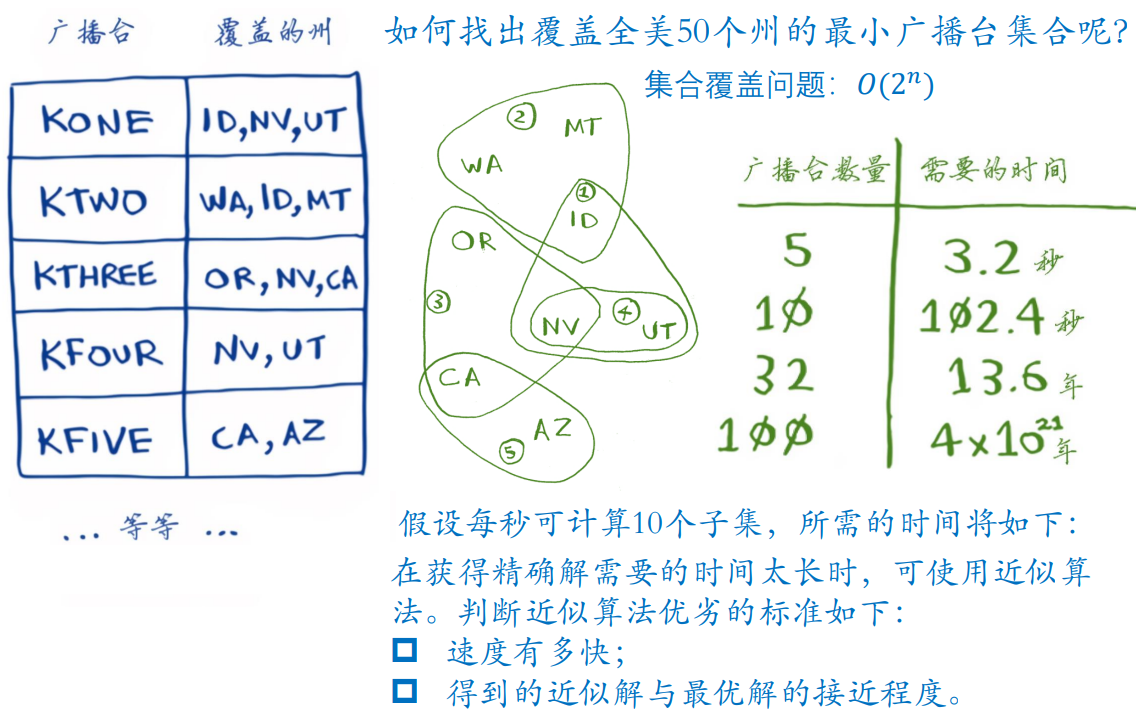

如何找出覆盖全美50个州的最小广播台集合呢？ 集合覆盖问题：$O(2^{n})$

假设每秒可计算10个子集，所需的时间将如下：

在获得精确解需要的时间太长时，可使用近似算法。判断近似算法优劣的标准如下：

- 速度有多快；

- 得到的近似解与最优解的接近程度。

贪婪算法可化解危机！使用下面的贪婪算法可得到非常接近的解：

1. 选出这样一个广播台，即它覆盖了最多的未覆盖州。即便这个广播台覆盖了一些已覆盖的州，也没有关系。

2. 重复第一步，直到覆盖了所有的州。

贪婪算法是不错的选择，它们不仅简单，而且通常运行速度很快。在这个例子中，贪婪算法的运行时间为 $O(n^{2})$ ，其中 n 为广播台数量。

In [7]:
states_needed = set(["mt", "wa", "or", "id", "nv", "ut", "ca", "az"])
stations = {}
stations["kone"] = set(["id", "nv", "ut"])
stations["ktwo"] = set(["wa", "id", "mt"])
stations["kthree"] = set(["or", "nv", "ca"])
stations["kfour"] = set(["nv", "ut"])
stations["kfive"] = set(["ca", "az"])

final_stations = set()

while states_needed:
    best_station = None
    states_covered = set()
    for station, states in stations.items():
        covered = states_needed & states
        if len(covered) > len(states_covered):
            best_station = station
            states_covered = covered
    states_needed -= states_covered
    final_stations.add(best_station)
print(final_stations)

{'ktwo', 'kfive', 'kthree', 'kone'}


## 多机调度问题

任给有穷的作业集 A 和 m 台相同的机器，作业 a 的处理时间为正整数 t(a),每一项作业可以在任一台机器上处理。

如何把作业分配给机器才能使完成所有作业的时间最短?

即，如何把 A 划分成 m 个不相交的子集 $A_{i}$，使得

\max \left\{\sum_{a \in A_{i}} t(a) \mid i=1,2, \cdots, m\right\}

最小?

## 例子

一个运行实例例如，3 台机器，8 项作业,处理时间依次为: 3,4,3,6,5,3,8,4

算法的解:{1,4} ，{2,6,7}，{3,5,8},

负载: 3+6=9，4+3+8=15，3+5+4=12

完成作业时间:15

## 贪心法 G-MPS

机器 i 的负载:已分配给 i 的作业处理时间之和。

算法 G-MPS:

1. 按输入的顺序分配作业

2. 把每一项作业分配给当前负载最小的机器

3. 若当前负载最小的机器有2台或2台以上，则分配给其中的任意一台(比如标号最小的一台)

一个运行实例例如，3台机器，8项作业,处理时间依次为:3,4,3,6,5,3,8,4

算法的解:{1,4} ，{2,6,7}，{3,5,8},

负载:3+6=9，4+3+8=15，3+5+4=12

完成作业时间:15

最优解处理时间为3,4,3,6,5,3,8,4

最优解:{1,3,4}，{2,5,6}，{7,8}

负载:3+3+6=12，4+5+3=12，8+4=12

完成作业时间:12

## 贪心法 G-MPS 性能

定理 对多机调度问题每个有 m 台机器的实例 l，则 $\mathrm{G}-\operatorname{MPS}(I) \leq\left(2-\frac{1}{m}\right) \mathrm{OPT}(I)$

证 (1)最大负载不小于单任务负载

$\mathrm{OPT}(I) \geq \max _{a \in A} t(a)$

(2)最大负载不小于平均负载

$\mathrm{OPT}(I) \geq \frac{1}{m} \sum_{a \in A} t(a)$

设机器 $M_{j}$ 的负载最大，记作 $t(M_{j})$。设 b 是最后被分配给机器 $M_{j}$的作业。由算法,在分配 b 时 $M_{j}$ 的负载最小，则有：

$t\left(M_{j}\right)-t(b) \leq \frac{1}{m}\left(\sum_{a \in A} t(a)-t(b)\right)$

\begin{gathered}
\begin{aligned}
G-\operatorname{MPS}(I) &=t\left(M_{j}\right) \\
& \leq \frac{1}{m}\left(\sum_{a \in A} t(a)-t(b)\right)+t(b) \\
& \leq \frac{1}{m} \sum_{a \in A} t(a)+\left(1-\frac{1}{m}\right) t(b) \\
&=\left(2-\frac{1}{m}\right) \mathrm{OPT}(I)
\end{aligned}
\end{gathered}


## 一个紧实例

m 台机器， m(m-1)+1 项作业，前 m(m-1) 项作业处理时间都为 1，最后一项作业处理时间为 m。

算法解：前 m(m-1) 项作业均分给 m 台机器，每台 m-1 项，最后作业任给一台机器，G-MPS(I)= 2m-1。

最优解：前 m(m-1) 项作业均分给 m-1 台机器，每台m项，最后 1 项分给留下的机器， OPT(I)= m。

G-MPS 是 2-近似算法。

## 改进的贪心近似算法

递降贪心法DG-MPS:

按处理时间从大到小重新排列作业,然后运用 G-MPS。例如对上述紧实例得到最优解.

对另一个实例:3,4,3,6,5,3,8,4

重新排序8,6,5,4,4,3,3,3

负载为:8+3=11,6+4+3=13,5+4+3=12


## 近似比

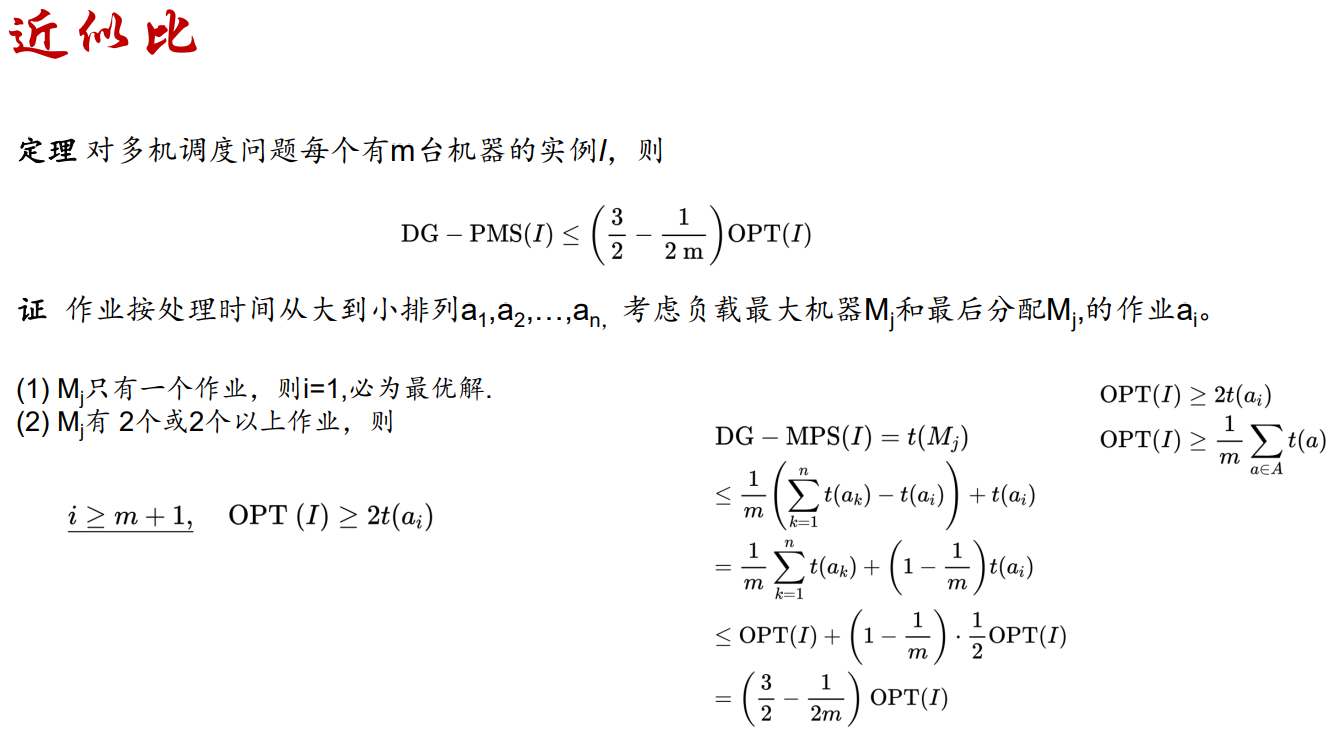